In [7]:
import  numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP


In [8]:
r0= 8*10**-3 # unit: mm
re = np.linspace(9,29,11)*10**-3
ha = 20 #unit: w/m^2k
k = 237 # unit:w/mK
df = 0.2*10**-3 # mm
m = (ha*2/(k*df))**0.5
m

29.049644688706337

In [9]:
B1 = (sp.i1(m*re)*sp.k1(m*r0)-sp.k1(m*re)*sp.i1(m*r0))/(sp.i0(m*r0)*sp.k1(m*re)+sp.i1(m*re)*sp.k0(m*r0))
B1

array([0.03085604, 0.10318267, 0.18894151, 0.28688988, 0.39537833,
       0.51241718, 0.63577751, 0.76311382, 0.89209314, 1.02051501,
       1.14640984])

In [10]:
uf = 2*r0*B1/(m*(re**2-r0**2))
uf

array([0.99970166, 0.99703649, 0.99109949, 0.98145076, 0.96785322,
       0.95026863, 0.9288444 , 0.90388987, 0.87584347, 0.84523391,
       0.81263972])

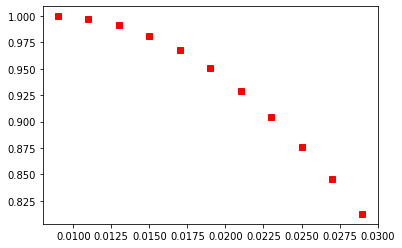

In [11]:
plt.plot(re,uf,"rs")
plt.show()

In [ ]:
import CoolProp.CoolProp as CP
from RefCycle import refCycle
import numpy as np
import scipy.linalg as alg
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def suctionTemp(Tk,Te,Tsub,eihx):
    return eihx*(Tk-Tsub-Te)+Te

#定义系统循环：

ref = "R600a"
subcoolDegree = 1.5
condTemp = np.linspace(35,45,3)
evapTemp = np.linspace(-30,-10,21)
Eihx = 0.85

rf1 = refCycle(ref,32,evapTemp,condTemp,condTemp-subcoolDegree)
rf2 = refCycle(ref,27,evapTemp,condTemp,condTemp-subcoolDegree)
rf3 = refCycle(ref,22,evapTemp,condTemp,condTemp-subcoolDegree)
density1 = rf1.denSuction()
density2 = rf2.denSuction()
density3 = rf3.denSuction()
plt.figure(figsize=(10, 5))
plt.plot(evapTemp, density1,label = "Suction Temp. =32℃",linestyle='dashdot',marker = "v",color ="red")
plt.plot(evapTemp, density2,label = "Suction Temp. = 27℃",linestyle=':',marker = "x",color ="blue")
plt.plot(evapTemp, density3,label = "Suction Temp. = 22℃",linestyle='--',marker = "d",color ="green")
plt.xlabel("Evaporating Temperature(centigrade)")
plt.ylabel('Gas suction density(kg/m^3)')
plt.savefig('fig1.png',dpi=75)
plt.legend()
plt.show()
